# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
#Dependencies
import pandas as pd
import json
import requests
from api_keys import weather_api_key
from pprint import pprint
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

## Generate Cities List

In [6]:
full_cities_file = pd.read_csv("../Resources/output_data/worldcities.csv")

#Get a random sample of 1000 cities from full_cities_file

full_cities_file.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


In [7]:
full_cities_file.describe()

,lat,lng,population,id
count,41001.000000,41001.000000,4.026300e+04,4.100100e+04
mean,30.909850,-4.228119,1.117614e+05,1.487309e+09
std,23.504898,68.759032,7.248917e+05,2.847205e+08
min,-54.934100,-179.590000,0.000000e+00,1.004003e+09
25%,19.190300,-71.850000,8.194000e+03,1.250291e+09
50%,39.885400,3.333300,1.583100e+04,1.484693e+09
75%,47.371700,25.983300,3.982350e+04,1.807301e+09
max,81.716600,179.366700,3.797700e+07,1.934000e+09


In [9]:
#Commented out the line below so that a fixed sample of 600 is used 
#rather than changing everytime we run this code

#cities_file = (full_cities_file.sample(600)).to_csv("../Resources/output_data/cities_names.csv", index= False, header = True)

In [8]:
interest_cities = pd.read_csv("../Resources/output_data/cities_names.csv")
interest_cities = interest_cities[['city','lat', 'lng', 'country','iso2',]]

print(len(interest_cities))

interest_cities.head()

600


,city,lat,lng,country,iso2
0,Arima,10.6374,-61.2823,Trinidad And Tobago,TT
1,Shankou,24.5032,116.4046,China,CN
2,Uraí,-23.1978,-50.7958,Brazil,BR
3,Farmington,44.6573,-93.1688,United States,US
4,Tsetserleg,47.4769,101.4503,Mongolia,MN


643

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
#Create a new dataFrame to hold all values
cities_pd = pd.DataFrame()
cities_pd["City"] = ""
cities_pd["Lat"] = ""
cities_pd["Lng"] = ""
cities_pd["Max Temp"] = ""
cities_pd["Humidity"] = ""
cities_pd["Cloudiness"] = ""
cities_pd["Wind Speed"] = ""
cities_pd["Country"] = ""
cities_pd["Date"] = ""
cities_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [10]:
#Base url for collecting information
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&"

#Empty list to append data into
cities =[]
lat = []
long = []
country_code = []
cloudiness = []
date = []
humidity = []
wind_speed =[]
max_temp = []

#Data to loop

set_num = 1
units = "Imperial"
print("Beginning Data Retrieval")
print("--------------------------------")

for index, row in interest_cities.iterrows():
    lat = row['lat']
    lon = row['lng']
     
    response = requests.get(f"{url}lat={lat}&lon={lon}&units={units}").json()
        
    try:    
        print(f"Processing Record {index +1} of Set {set_num} | {response['name']}")    
    
        cities_pd.loc[index, "City"] = response["name"]
        cities_pd.loc[index, "Lat"] = response["coord"]["lat"]
        cities_pd.loc[index, "Lng"] = response["coord"]["lon"]
        cities_pd.loc[index, "Max Temp"] = response["main"]["temp_max"]
        cities_pd.loc[index, "Humidity"] = response["main"]["humidity"]
        cities_pd.loc[index, "Cloudiness"] = response["clouds"]["all"]
        cities_pd.loc[index, "Wind Speed"] = response["wind"]["speed"]
        cities_pd.loc[index, "Country"] = response["sys"]["country"]
        cities_pd.loc[index, "Date"] = response["dt"]

    except(KeyError):
        print("City not found. Skipping...")
        set_num += 1


Beginning Data Retrieval
--------------------------------
Processing Record 1 of Set 1 | Arima
Processing Record 2 of Set 1 | Huliao
Processing Record 3 of Set 1 | Leópolis
Processing Record 4 of Set 1 | Farmington
Processing Record 5 of Set 1 | Cecerleg
Processing Record 6 of Set 1 | Charta
Processing Record 7 of Set 1 | Melrose
Processing Record 8 of Set 1 | Visp
Processing Record 9 of Set 1 | Surat Thani
Processing Record 10 of Set 1 | Kupino
Processing Record 11 of Set 1 | Pueblo Nuevo
Processing Record 12 of Set 1 | Stoodley Corners
Processing Record 13 of Set 1 | Mina Clavero
Processing Record 14 of Set 1 | Avola
Processing Record 15 of Set 1 | Saint-Nazaire
Processing Record 16 of Set 1 | Kumalarang
Processing Record 17 of Set 1 | Seto
Processing Record 18 of Set 1 | Salvaterra
Processing Record 19 of Set 1 | Jiangpan
Processing Record 20 of Set 1 | Hialeah Gardens
Processing Record 21 of Set 1 | Tiverton
Processing Record 22 of Set 1 | Akron
Processing Record 23 of Set 1 | ‘En 

Processing Record 192 of Set 1 | Glenwood
Processing Record 193 of Set 1 | L'Isle-Adam
Processing Record 194 of Set 1 | Ocean City
Processing Record 195 of Set 1 | Pistoia
Processing Record 196 of Set 1 | Cabildo
Processing Record 197 of Set 1 | Längwitz
Processing Record 198 of Set 1 | Herculândia
Processing Record 199 of Set 1 | Lokhvytsya
Processing Record 200 of Set 1 | Goffstown
Processing Record 201 of Set 1 | Herford
Processing Record 202 of Set 1 | Ifs
Processing Record 203 of Set 1 | Ayutuxtepeque
Processing Record 204 of Set 1 | Mascara
Processing Record 205 of Set 1 | Kyakhulay
Processing Record 206 of Set 1 | Glenarden
Processing Record 207 of Set 1 | Gabriel Monteiro
Processing Record 208 of Set 1 | Juuka
Processing Record 209 of Set 1 | Hāgere Hiywet
Processing Record 210 of Set 1 | Dunkerque
Processing Record 211 of Set 1 | Yongle
Processing Record 212 of Set 1 | Aragarças
Processing Record 213 of Set 1 | Camiri
Processing Record 214 of Set 1 | Zeghanghane
Processing Rec

Processing Record 383 of Set 1 | Saint-Thibault-des-Vignes
Processing Record 384 of Set 1 | Shilka
Processing Record 385 of Set 1 | Pomona
Processing Record 386 of Set 1 | Decimomannu
Processing Record 387 of Set 1 | Orange Cove
Processing Record 388 of Set 1 | El Rio
Processing Record 389 of Set 1 | Denfield
Processing Record 390 of Set 1 | Korolyov
Processing Record 391 of Set 1 | Centerville
Processing Record 392 of Set 1 | Yoshkar-Ola
Processing Record 393 of Set 1 | Lake Zurich
Processing Record 394 of Set 1 | Drexel Hill
Processing Record 395 of Set 1 | Chichimila
Processing Record 396 of Set 1 | Java
Processing Record 397 of Set 1 | Alpinópolis
Processing Record 398 of Set 1 | Camarillo
Processing Record 399 of Set 1 | Castelnuovo Berardenga
Processing Record 400 of Set 1 | Saint-Dizier
Processing Record 401 of Set 1 | Ceyrat
Processing Record 402 of Set 1 | Fundeni
Processing Record 403 of Set 1 | Cowdenbeath
Processing Record 404 of Set 1 | Arinos
Processing Record 405 of Set 

Processing Record 571 of Set 2 | São João Nepomuceno
Processing Record 572 of Set 2 | Gaithersburg
Processing Record 573 of Set 2 | Wagoner
Processing Record 574 of Set 2 | Cresaptown
Processing Record 575 of Set 2 | Virginia Beach
Processing Record 576 of Set 2 | Cruz
Processing Record 577 of Set 2 | Guam
Processing Record 578 of Set 2 | Hillsdale
Processing Record 579 of Set 2 | Sveio
Processing Record 580 of Set 2 | Phon
Processing Record 581 of Set 2 | Ajacuba
Processing Record 582 of Set 2 | Alcorcón
Processing Record 583 of Set 2 | Samut Prakan
Processing Record 584 of Set 2 | Geneina
Processing Record 585 of Set 2 | Bloemfontein
Processing Record 586 of Set 2 | Krimpen aan den IJssel
Processing Record 587 of Set 2 | Presidente Olegário
Processing Record 588 of Set 2 | Albertirsa
Processing Record 589 of Set 2 | Fuyang
Processing Record 590 of Set 2 | West Bromwich
Processing Record 591 of Set 2 | Boulemane
Processing Record 592 of Set 2 | Lewistown
Processing Record 593 of Set 2

In [11]:
cities_pd

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arima,10.6374,-61.2823,76.66,93,20,0,TT,1631353324
1,Huliao,24.5032,116.4046,89.24,56,36,3.33,CN,1631353325
2,Leópolis,-23.1978,-50.7958,64.45,73,100,3.06,BR,1631353325
3,Farmington,44.6573,-93.1688,68.09,87,1,0,US,1631353327
4,Cecerleg,47.4769,101.4503,44.29,96,100,5.86,MN,1631353328
...,...,...,...,...,...,...,...,...,...
595,Villeurbanne,45.7667,4.8803,73.99,68,20,6.91,FR,1631354076
596,Waldsee,49.3956,8.4406,73.06,75,75,5.75,DE,1631354077
597,Shinfield,51.408,-0.947,69.46,81,75,1.99,GB,1631354078
598,Ka Soleil,19.4456,-72.6883,77.16,83,84,4.76,HT,1631354080


In [13]:
#sample response to check what to pick
lat = 26.4103
lon = 112.3913
units= "Imperial"
sample_url = f"http://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}&units={units}"

sample_response = requests.get(sample_url).json()
pprint(sample_response)

{'base': 'stations',
 'clouds': {'all': 23},
 'cod': 200,
 'coord': {'lat': 26.4103, 'lon': 112.3913},
 'dt': 1631354302,
 'id': 1815618,
 'main': {'feels_like': 94.42,
          'grnd_level': 992,
          'humidity': 50,
          'pressure': 1003,
          'sea_level': 1003,
          'temp': 89.91,
          'temp_max': 89.91,
          'temp_min': 89.91},
 'name': 'Yiyang',
 'sys': {'country': 'CN', 'sunrise': 1631312066, 'sunset': 1631356812},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 6, 'gust': 13.4, 'speed': 6.06}}


In [66]:
sample_response["dt"]

1631335454

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
cities_pd = cities_pd.dropna()
cities_pd.to_csv("../Resources/output_data/cities_data.csv", index= False, header = True)
cities_pd


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arima,10.6374,-61.2823,76.66,93,20,0,TT,1631353324
1,Huliao,24.5032,116.4046,89.24,56,36,3.33,CN,1631353325
2,Leópolis,-23.1978,-50.7958,64.45,73,100,3.06,BR,1631353325
3,Farmington,44.6573,-93.1688,68.09,87,1,0,US,1631353327
4,Cecerleg,47.4769,101.4503,44.29,96,100,5.86,MN,1631353328
...,...,...,...,...,...,...,...,...,...
595,Villeurbanne,45.7667,4.8803,73.99,68,20,6.91,FR,1631354076
596,Waldsee,49.3956,8.4406,73.06,75,75,5.75,DE,1631354077
597,Shinfield,51.408,-0.947,69.46,81,75,1.99,GB,1631354078
598,Ka Soleil,19.4456,-72.6883,77.16,83,84,4.76,HT,1631354080


In [17]:
#To convert data to a float data type
#cities_pd = cities_pd.astype({'Lat': float, 'Lng': float,'Max Temp': float,'Humidity': float,'Cloudiness': float,'Wind Speed': float,'Date': int})

In [18]:
cities_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,30.447051,-11.721233,70.634775,71.023372,46.649416,5.261820,1.631354e+09
std,23.169868,65.905279,10.120373,22.042513,40.586305,4.126131,2.216840e+02
min,-45.571200,-169.816700,40.730000,7.000000,0.000000,0.000000,1.631353e+09
25%,15.975000,-74.274100,63.790000,59.000000,1.000000,2.250000,1.631353e+09
50%,39.949500,-1.228600,70.920000,77.000000,40.000000,4.360000,1.631354e+09
75%,46.827350,19.661700,78.140000,88.000000,91.000000,7.440000,1.631354e+09
max,67.614200,153.400000,108.630000,100.000000,100.000000,22.370000,1.631354e+09


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [19]:
filtered_cities_pd = cities_pd[cities_pd['Humidity']<=100]
filtered_cities_pd

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arima,10.6374,-61.2823,76.66,93.0,20.0,0.00,TT,1631353324
1,Huliao,24.5032,116.4046,89.24,56.0,36.0,3.33,CN,1631353325
2,Leópolis,-23.1978,-50.7958,64.45,73.0,100.0,3.06,BR,1631353325
3,Farmington,44.6573,-93.1688,68.09,87.0,1.0,0.00,US,1631353327
4,Cecerleg,47.4769,101.4503,44.29,96.0,100.0,5.86,MN,1631353328
...,...,...,...,...,...,...,...,...,...
595,Villeurbanne,45.7667,4.8803,73.99,68.0,20.0,6.91,FR,1631354076
596,Waldsee,49.3956,8.4406,73.06,75.0,75.0,5.75,DE,1631354077
597,Shinfield,51.4080,-0.9470,69.46,81.0,75.0,1.99,GB,1631354078
598,Ka Soleil,19.4456,-72.6883,77.16,83.0,84.0,4.76,HT,1631354080


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

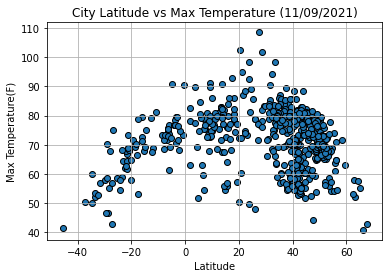

In [20]:
fig1, ax1 = plt.subplots()
plt.scatter(filtered_cities_pd['Lat'],filtered_cities_pd['Max Temp'] , edgecolors = 'black')
plt.title('City Latitude vs Max Temperature (11/09/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.grid(True)
plt.savefig("../Resources/output_data/Max Temp v Latitude.png")
plt.show()

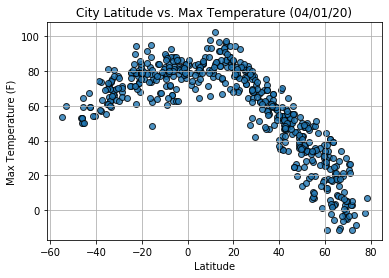

## Latitude vs. Humidity Plot

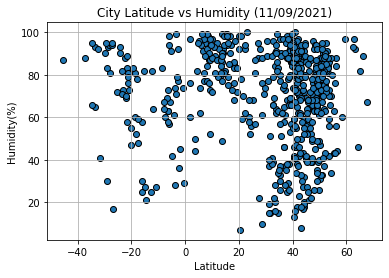

In [21]:
fig2, ax2 = plt.subplots()
plt.scatter(filtered_cities_pd['Lat'],filtered_cities_pd['Humidity'] , edgecolors = 'black')
plt.title('City Latitude vs Humidity (11/09/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid(True)
plt.savefig("../Resources/output_data/Humidity v Latitude.png")
plt.show()

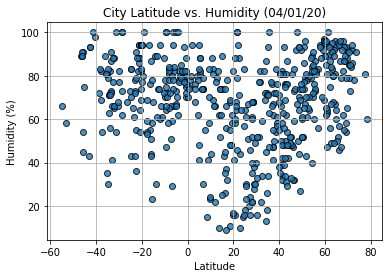

## Latitude vs. Cloudiness Plot

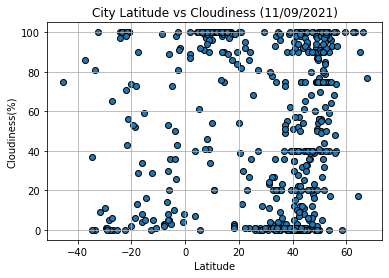

In [22]:
fig3, ax3 = plt.subplots()
plt.scatter(filtered_cities_pd['Lat'],filtered_cities_pd['Cloudiness'] , edgecolors = 'black')
plt.title('City Latitude vs Cloudiness (11/09/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid(True)
plt.savefig("../Resources/output_data/Cloudiness v Latitude.png")
plt.show()

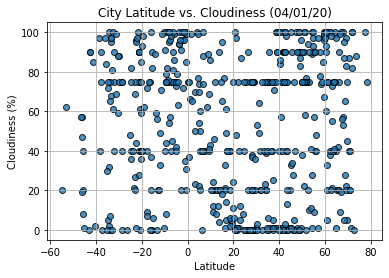

## Latitude vs. Wind Speed Plot

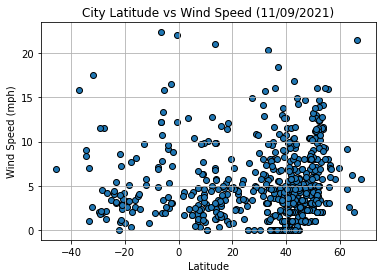

In [23]:
fig4, ax4 = plt.subplots()
plt.scatter(filtered_cities_pd['Lat'],filtered_cities_pd['Wind Speed'] , edgecolors = 'black')
plt.title('City Latitude vs Wind Speed (11/09/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.savefig("../Resources/output_data/Wind Speed v Latitude.png")
plt.show()

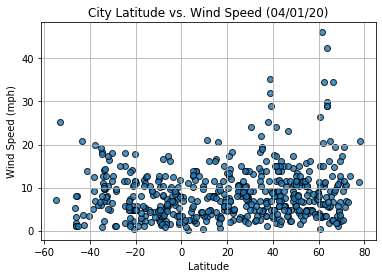

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.11558420647024387


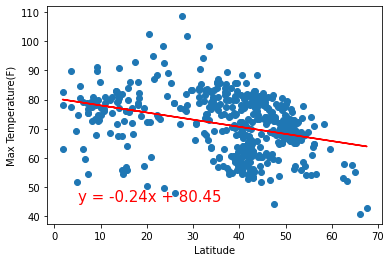

In [25]:
northern_cities_pd = filtered_cities_pd.loc[filtered_cities_pd['Lat']>0]
sothern_cities_pd = filtered_cities_pd.loc[filtered_cities_pd['Lat']<=0]

x_values = northern_cities_pd['Lat']
y_values = northern_cities_pd['Max Temp']

fig4, ax4 = plt.subplots()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,45),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.savefig("../Resources/output_data/NH - Max Temp v Latitude.png")
plt.show()


The r-value is: 0.46937863826630627


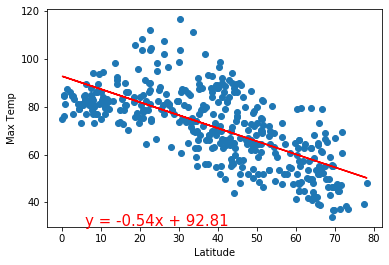

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6031257007285533


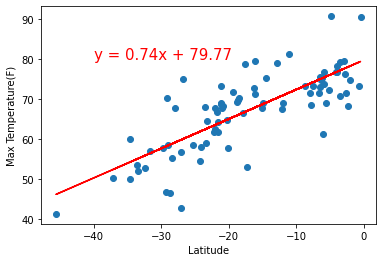

In [27]:
x_values = sothern_cities_pd['Lat']
y_values = sothern_cities_pd['Max Temp']

fig4, ax4 = plt.subplots()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,80),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.savefig("../Resources/output_data/SH - Max Temp v Latitude.png")
plt.show()

The r-value is: 0.6082708688906918


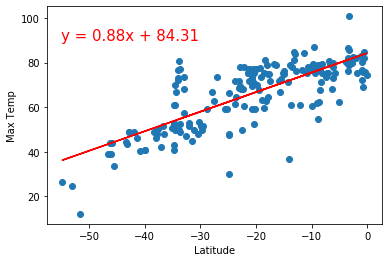

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03511498653045054


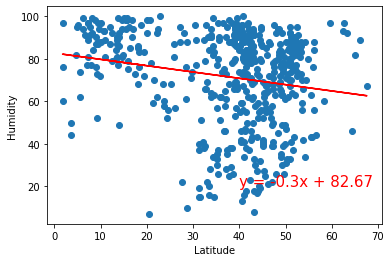

In [28]:
x_values = northern_cities_pd['Lat']
y_values = northern_cities_pd['Humidity']

fig5, ax5 = plt.subplots()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("../Resources/output_data/NH - Humidity v Latitude.png")
plt.show()

The r-value is: 0.000543987878808455


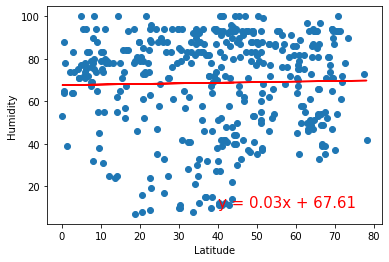

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06907722911412872


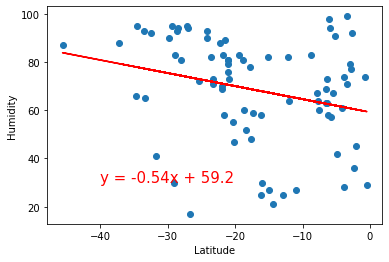

In [29]:
x_values = sothern_cities_pd['Lat']
y_values = sothern_cities_pd['Humidity']

fig4, ax4 = plt.subplots()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,30),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("../Resources/output_data/SH - Humidity v Latitude.png")
plt.show()

The r-value is: 0.014985174297345524


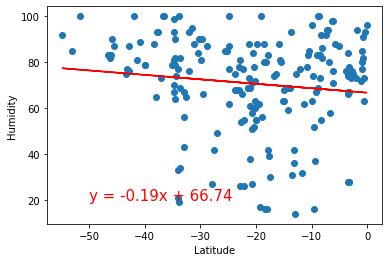

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.025004746709460155


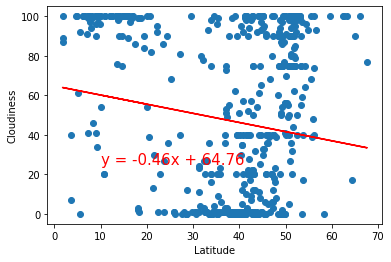

In [30]:
x_values = northern_cities_pd['Lat']
y_values = northern_cities_pd['Cloudiness']

fig6, ax6 = plt.subplots()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,25),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("../Resources/output_data/NH - Cloudiness v Latitude.png")
plt.show()

The r-value is: 0.0020898727664228514


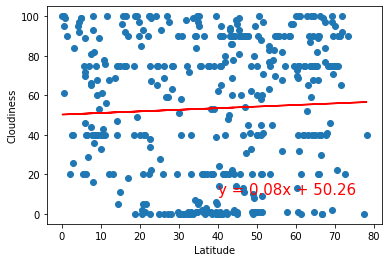

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0030342620780526718


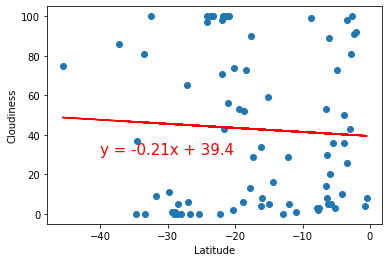

In [31]:
x_values = sothern_cities_pd['Lat']
y_values = sothern_cities_pd['Cloudiness']

fig4, ax4 = plt.subplots()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,30),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("../Resources/output_data/SH - Cloudiness v Latitude.png")
plt.show()

The r-value is: 0.0035263772085582894


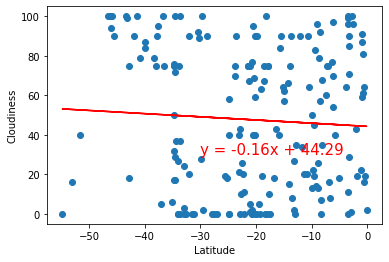

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03227700880807607


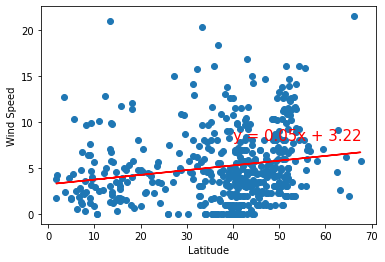

In [32]:
x_values = northern_cities_pd['Lat']
y_values = northern_cities_pd['Wind Speed']

fig6, ax6 = plt.subplots()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,8),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("../Resources/output_data/NH - Wind Speed v Latitude.png")
plt.show()


The r-value is: 0.04019723576144484


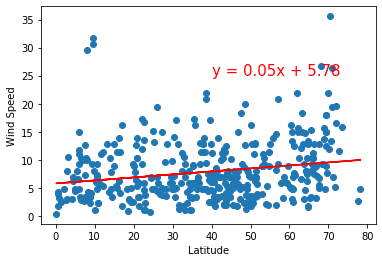

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.048896114992263776


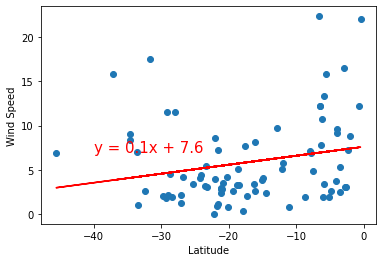

In [33]:
x_values = sothern_cities_pd['Lat']
y_values = sothern_cities_pd['Wind Speed']

fig4, ax4 = plt.subplots()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,7),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("../Resources/output_data/SH - Wind Speed v Latitude.png")
plt.show()

The r-value is: 0.017128274759839232


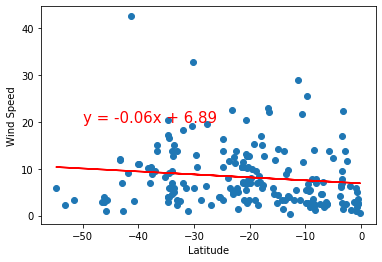